In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [7]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\corr_mat_rela.pkl", 'rb') as f:
    corr_mat_spread = pickle.load(f)

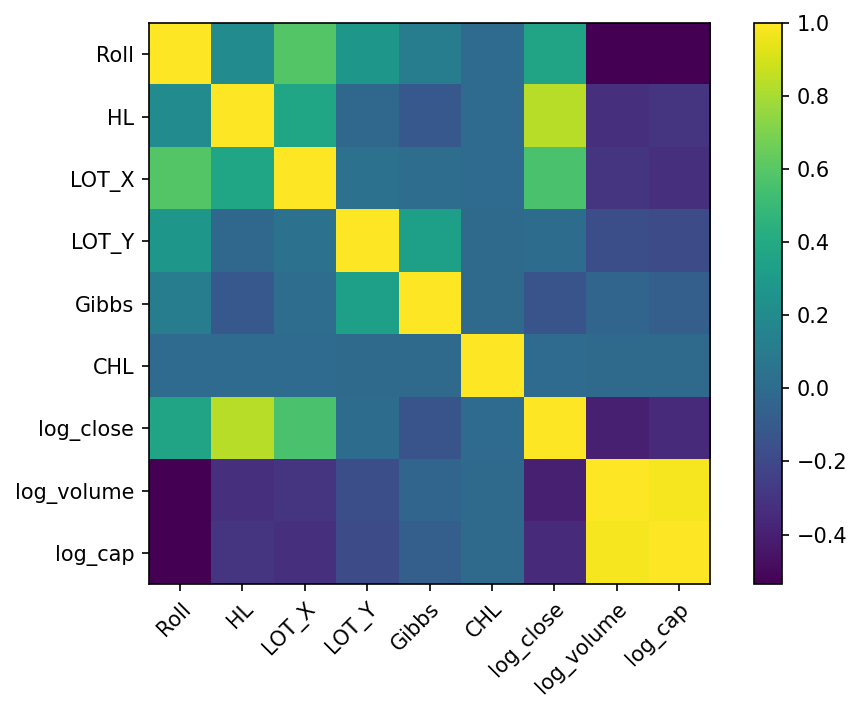

In [8]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL', 'log_close', 'log_volume', 'log_cap'])

plt.figure(dpi=150)
plt.xticks(np.arange(len(fea_names)), labels=fea_names, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(fea_names)), labels=fea_names)    


plt.imshow(corr_mat_spread)
plt.tight_layout()
plt.colorbar()
plt.show()


### 线性模型

In [20]:
Linear_spread_cs

array([497.2919   , -11.5642605,  -5.8240795, -30.18805  ,   1.1346637,
        -1.9573561,  -9.469158 , -23.516115 , -11.484039 ], dtype=float32)

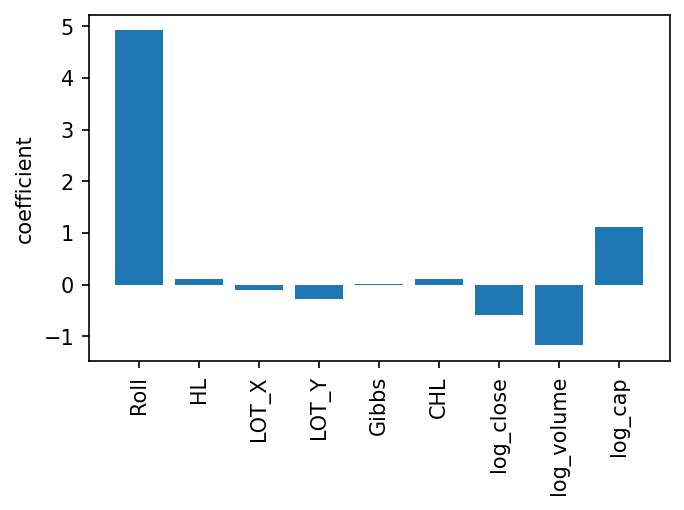

In [22]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\linear_spread_cs.pkl", 'rb') as f:
    Linear_spread_cs = pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\linear_rela_cs.pkl", 'rb') as f:
    Linear_rela_cs = pickle.load(f)

Linear_spread_cs = np.array([4.92,0.105,-0.0999,-0.2746,0.0095,0.1031,-0.5819,-1.1758,1.1227])
import matplotlib.pyplot as plt
fea_names = [ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL', 'log_close', 'log_volume', 'log_cap']  # 特征名字
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_spread_cs)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

plt.show()


<Figure size 800x500 with 0 Axes>

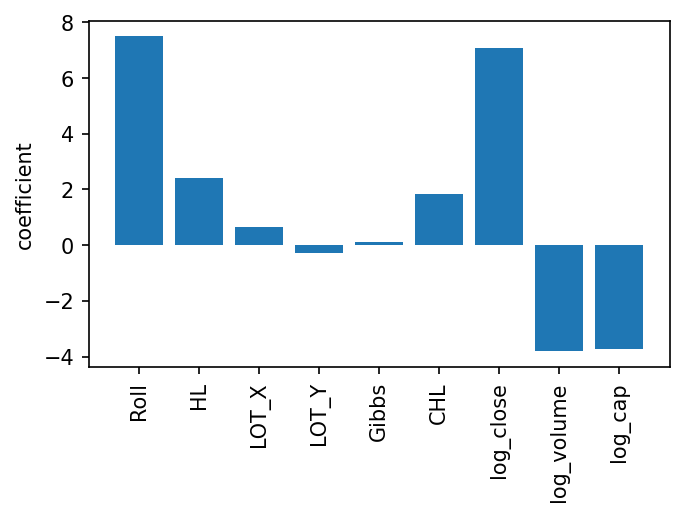

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
fea_names = [ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL', 'log_close', 'log_volume', 'log_cap']  # 特征名字
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_rela_cs*10)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

plt.show()

### 线性回归参数

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\x_spread.pkl", 'rb') as f:
    x_spread = pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\y_spread.pkl", 'rb') as f:
    y_spread = pickle.load(f)

# 奇异值分解
_, sigma, __ = np.linalg.svd(x_spread, full_matrices=False)
vif_spread = [variance_inflation_factor(x_spread, i) for i in range(x_spread.shape[1])]
# print(sigma)
print('cond: {:.4f}'.format(sigma[0]/sigma[-1]))
print('vif: ', vif_spread)
arg_spread = np.argsort(vif_spread)
print('vif arg: ', arg_spread)

cond: 14.0179
vif:  [2.20040922861547, 3.681471358315318, 1.1754866852991437, 1.162196305916166, 1.0000935880502009, 2.11637369957972, 5.208157862550111, 29.43908039371653, 28.200485270029155]
vif arg:  [4 3 2 5 0 1 6 8 7]


In [19]:
X = sm.add_constant(x_spread)
model = sm.OLS(y_spread,X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                 1.297e+04
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:19:42   Log-Likelihood:            -1.2257e+05
No. Observations:               48451   AIC:                         2.452e+05
Df Residuals:                   48441   BIC:                         2.453e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4596      0.014    105.777      0.000       1.433       1.487
x1             4.9266      0.020    240.434      0.000       4.886       4.967
x2             0.1053      0.027      3.975      0.000       0.053       0.157
x3            -0.0999      0.015     -6.671      0.000      -0.129      -0.071
x4            -0.2746      0.015    -18.350      0.000      -0.304      -0.245
x5             0.0095      0.014      0.687      0.492      -0.018       0.037
x6             0.1031      0.020      5.132      0.000       0.064       0.143
x7            -0.5819      0.032    -18.458      0.000      -0.644      -0.520
x8            -1.1758      0.075    -15.688      0.000      -1.323      -1.029
x9             1.1227      0.073     15.305      0.000       0.979       1.266
==============================================================================
Omnibus:                    74719.214   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        151499920.425
Skew:                           9.216   Prob(JB):                         0.00
Kurtosis:                     276.322   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 树模型

In [24]:
with open(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model\lgbm_wrela_cs.pkl', 'rb') as f:
    lgbm_rela = pickle.load(f)
with open(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model\lgbm_spread_cs.pkl', 'rb') as f:
    lgbm_spread = pickle.load(f)    

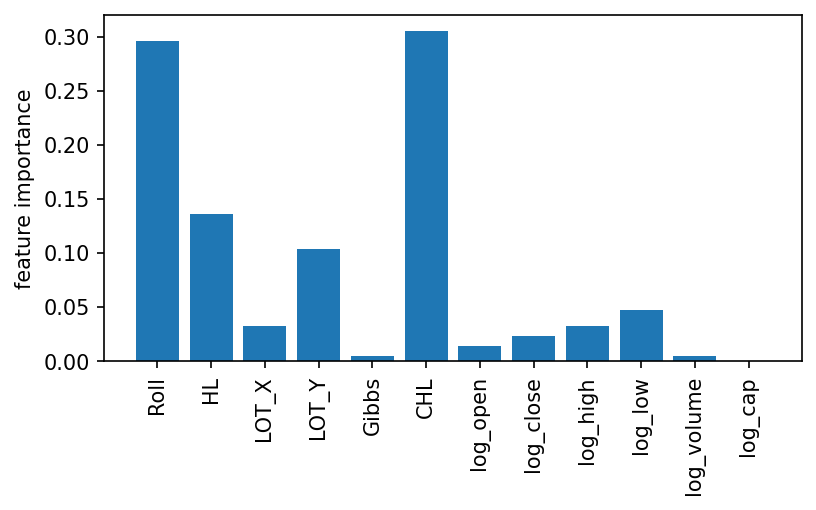

In [25]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
plt.figure(figsize=(6,3),dpi=150)
plt.bar(fea_names, (lgbm_spread.feature_importance()/np.sum(lgbm_spread.feature_importance()))[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11]])
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


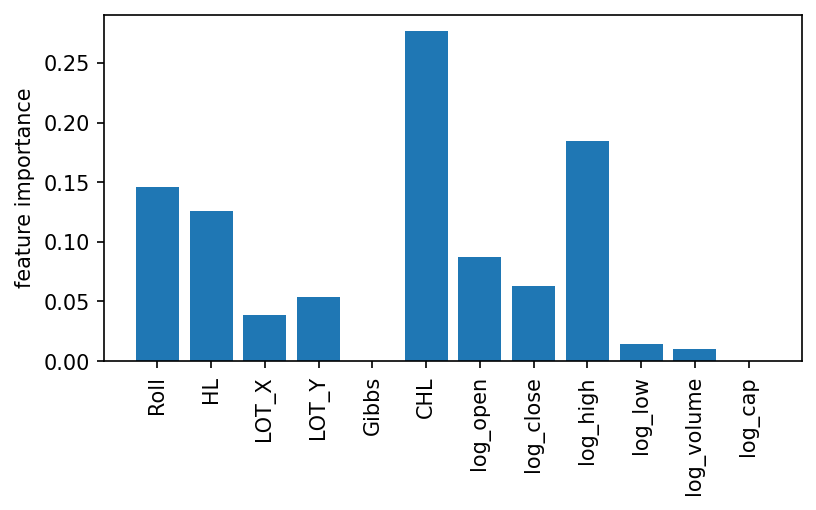

In [27]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
plt.figure(figsize=(6,3),dpi=150)
plt.bar(fea_names, (lgbm_rela.feature_importance()/np.sum(lgbm_rela.feature_importance()))[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11]])
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


### PDP

In [57]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_spread.pkl", 'rb') as f:
    x_m= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_spread.pkl", 'rb') as f:
    y_m = pickle.load(f)
    
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_spread_SZSE.pkl", 'rb') as f:
    x_m_s= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_spread_SZSE.pkl", 'rb') as f:
    y_m_s = pickle.load(f)

In [93]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_lgb.pkl", 'rb') as f:
    x_m= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_lgb.pkl", 'rb') as f:
    y_m = pickle.load(f)
    
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_lgb_SZSE.pkl", 'rb') as f:
    x_m_s= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_lgb_SZSE.pkl", 'rb') as f:
    y_m_s = pickle.load(f)

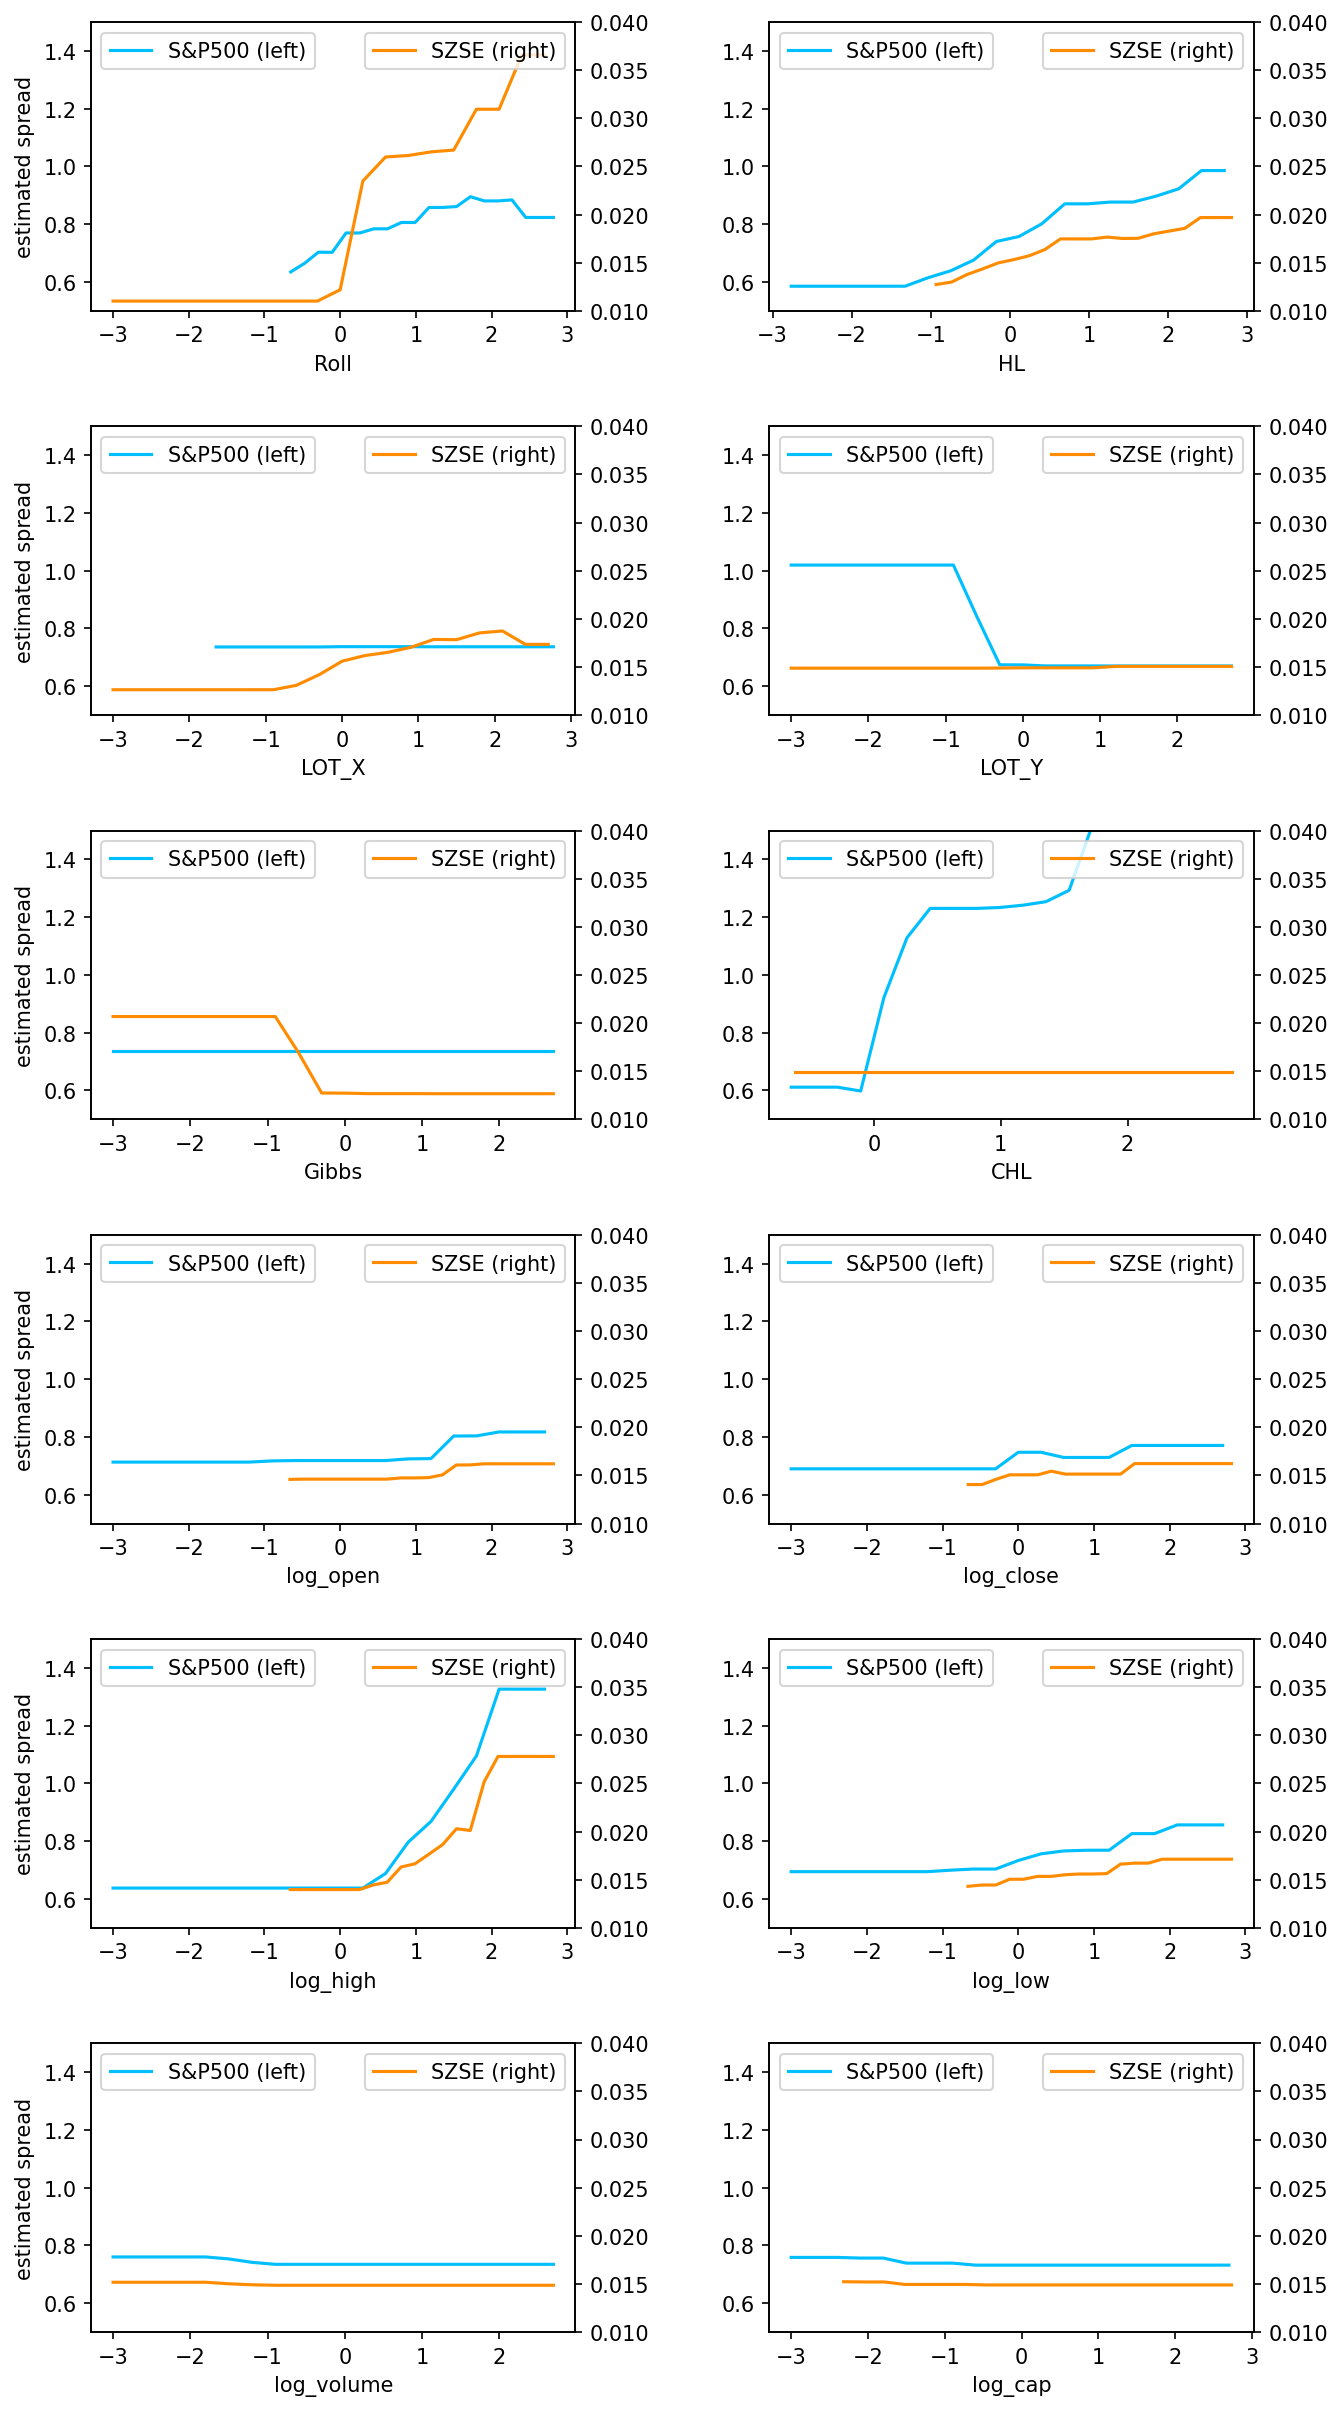

In [95]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])

fig = plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.ylim(0.5,1.5)
    plt.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][i]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][i]]), 
             color='deepskyblue', label='S&P500 (left)')
    plt.legend(loc=2)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated spread')
        
    plt.twinx()
    plt.ylim(0.01,0.04)
    plt.plot(x_m_s[i], np.array(y_m_s[i])/50, color='darkorange', label='SZSE (right)')
    plt.legend(loc=1)
#     plt.hist(x[:,i].cpu().numpy(),density=True)
    plt.xlabel(fea_names[i])
plt.show()

In [2]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_rela.pkl", 'rb') as f:
    x_m= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_rela.pkl", 'rb') as f:
    y_m = pickle.load(f)
    
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_rela_SZSE.pkl", 'rb') as f:
    x_m_s= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_rela_SZSE.pkl", 'rb') as f:
    y_m_s = pickle.load(f)

In [97]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_lgb_rela.pkl", 'rb') as f:
    x_m= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_lgb_rela.pkl", 'rb') as f:
    y_m = pickle.load(f)
    
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_lgb_rela_SZSE.pkl", 'rb') as f:
    x_m_s= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_lgb_rela_SZSE.pkl", 'rb') as f:
    y_m_s = pickle.load(f)

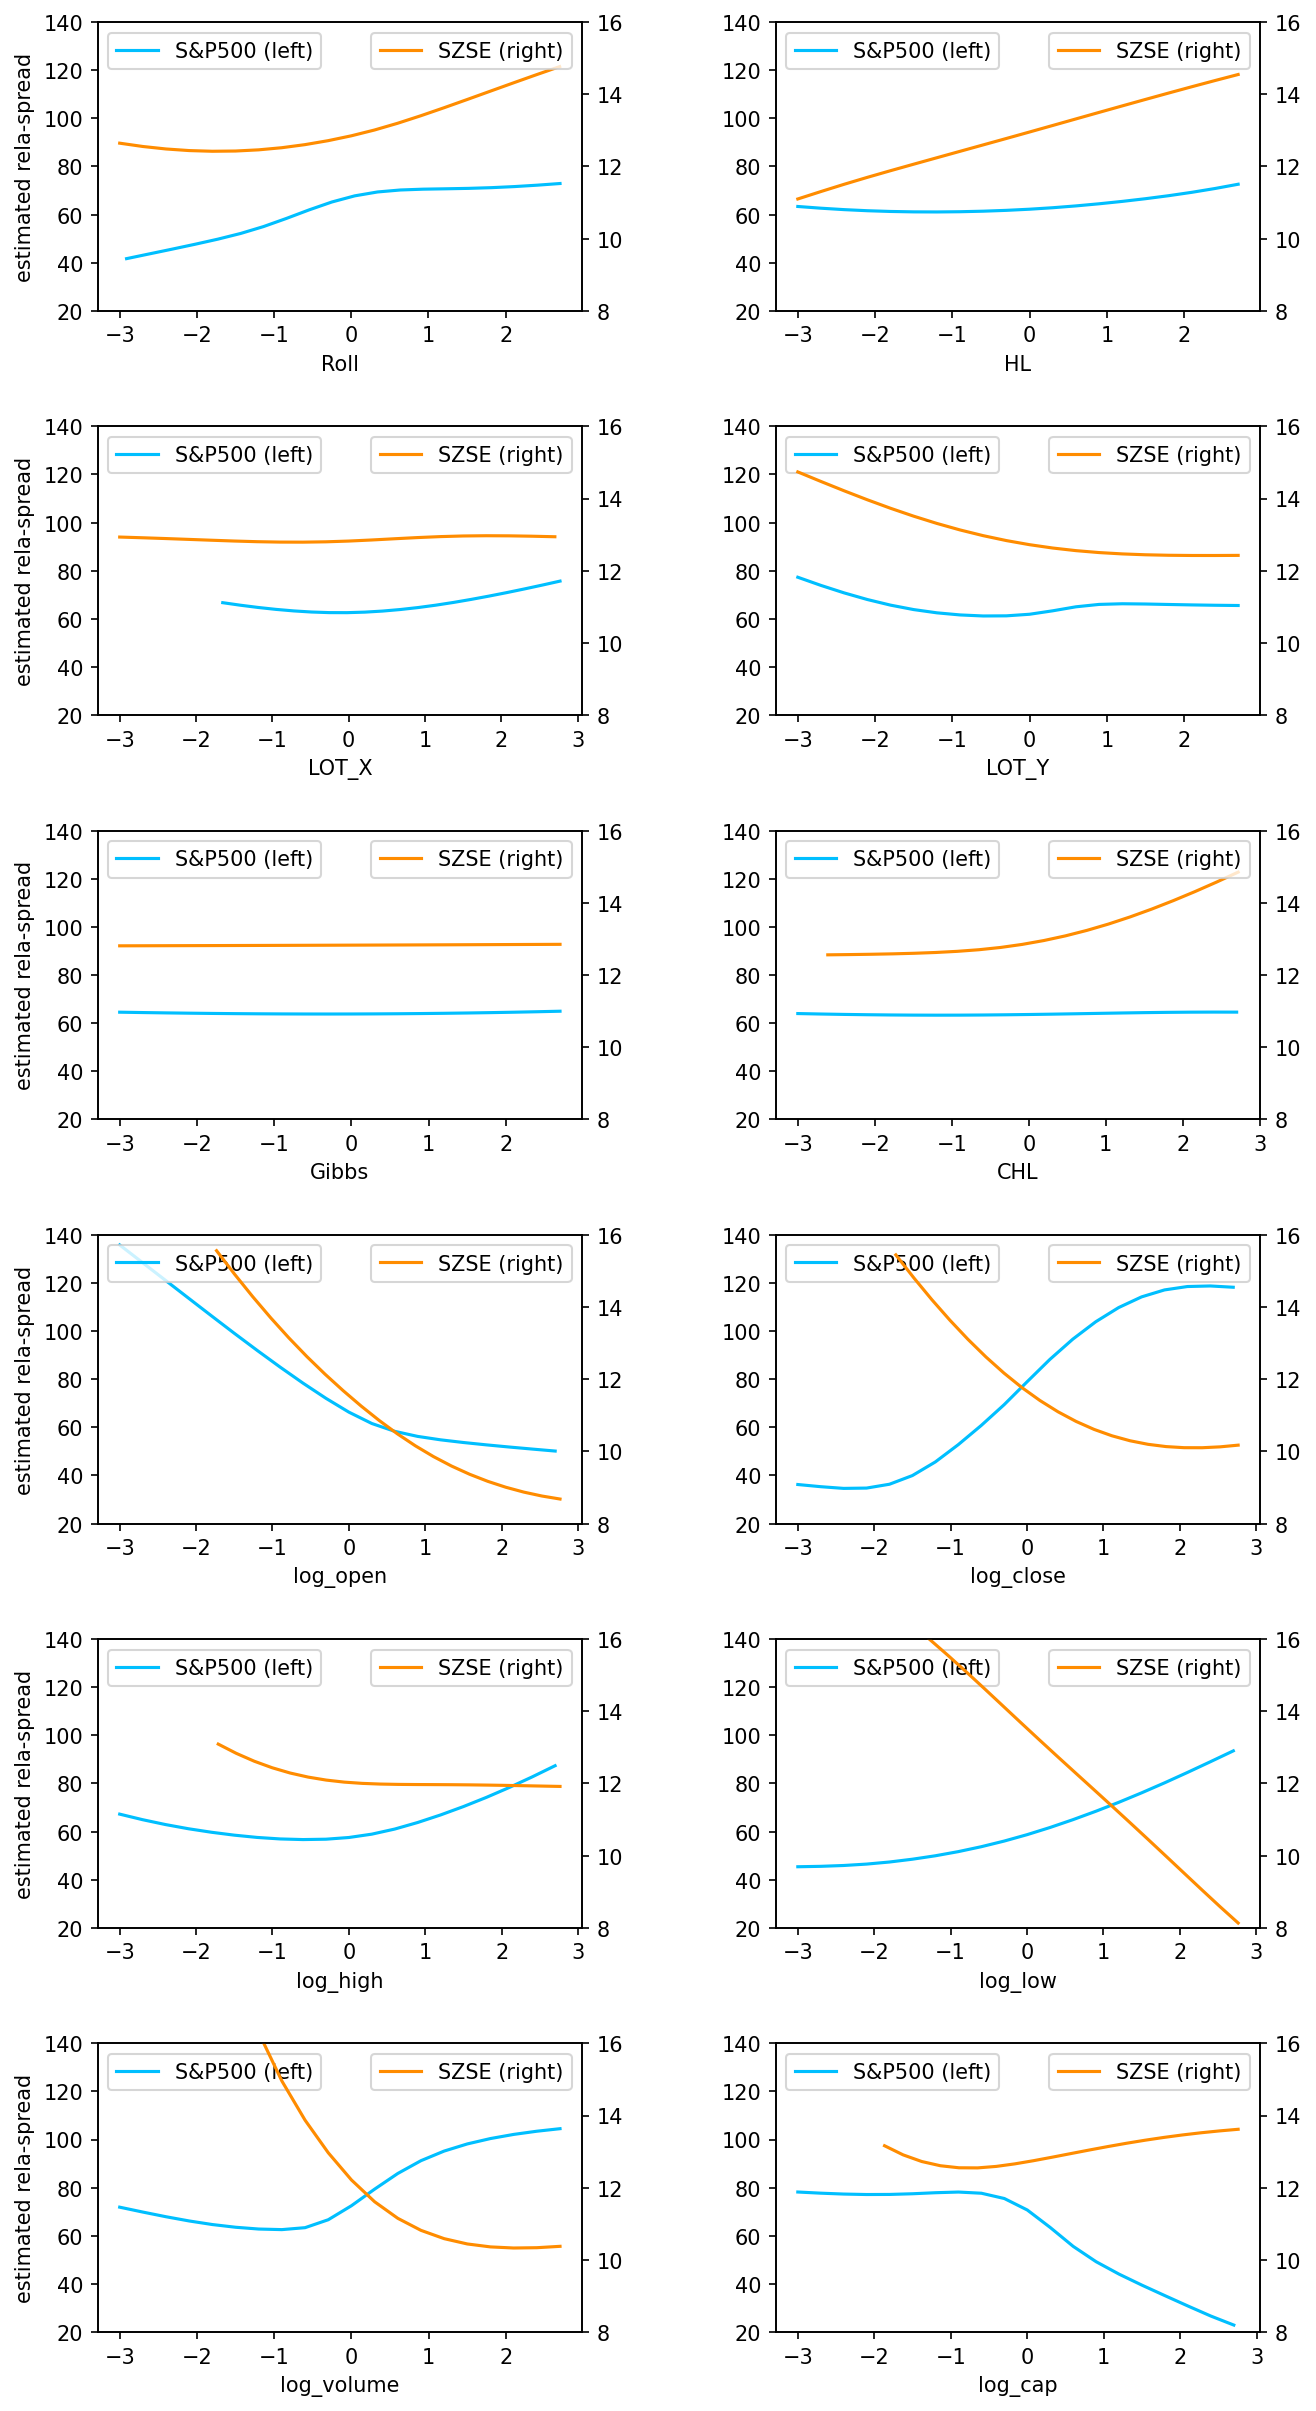

In [5]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])

fig = plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.ylim(20,140)
    plt.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][i]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][i]]), 
             color='deepskyblue', label='S&P500 (left)')
    plt.legend(loc=2)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated rela-spread')
        
    plt.twinx()
    plt.ylim(8,16)
    plt.plot(x_m_s[i], np.array(y_m_s[i]), color='darkorange', label='SZSE (right)')
    plt.legend(loc=1)
#     plt.hist(x[:,i].cpu().numpy(),density=True)
    plt.xlabel(fea_names[i])
plt.show()

### 中美的Linear coeeficient画到一起

In [10]:
SP500_spread = np.array([ 0.46760631,  0.29353484,  0.0029519 , -0.07611347, -0.00280489,
       -0.00306924,  0.04977264, -0.35059419,  0.30540535])*10
SP500_rela = np.array([ 7.80456105,  2.97351481,  0.35710506, -0.42714941,  0.07797794,
        1.31000235, 7.54663268, -2.19484437, -5.46057858])

SZSE_spread = np.array([0.5,0.07,0.005,-0.11,0.0001,0.35,1.35,-0.15,-0.32])
SZSE_rela = np.array([0.013,0.2,0.17,-0.15,0.002,-0.25,-2.45,-0.75,-0.76])

fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                       'log_close', 'log_volume', 'log_cap'])

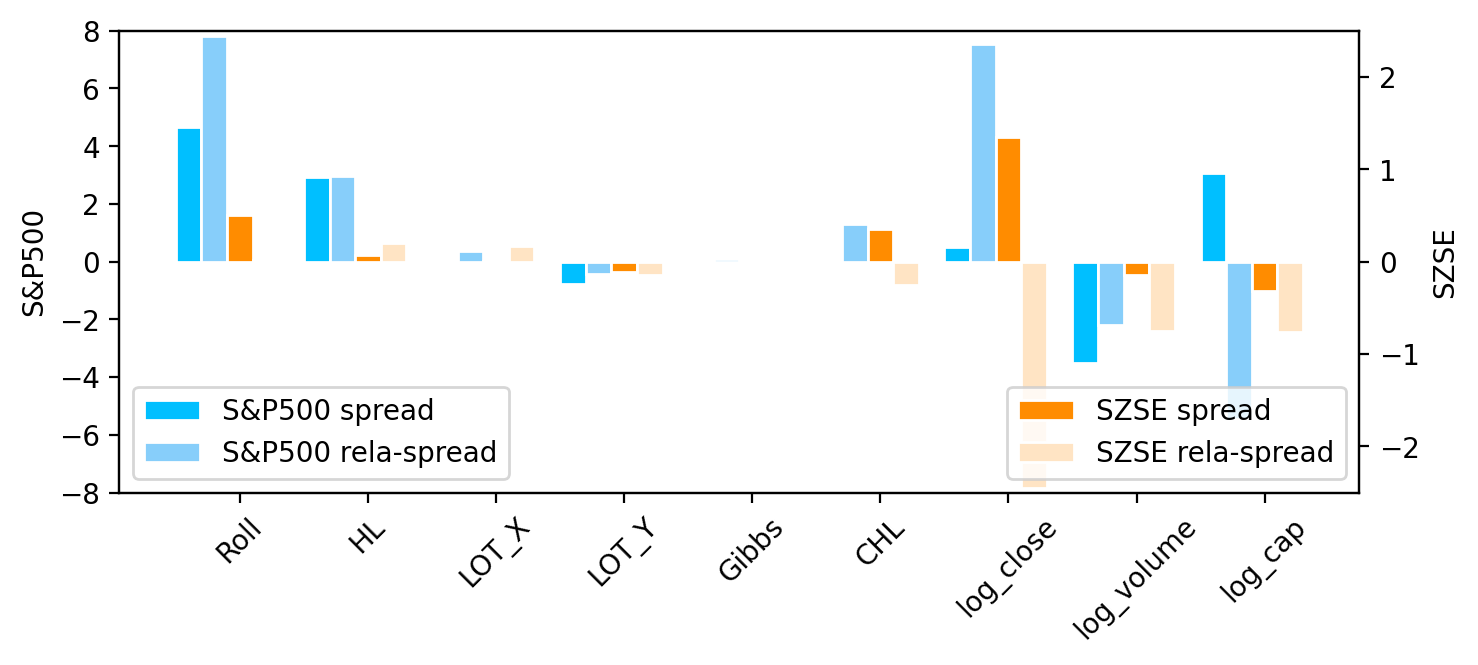

In [11]:
barWidth = 0.2
r1 = np.arange(len(fea_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize=(8,3), dpi=200)

ax1 = fig.add_subplot()
ax1.set_ylim(-8,8)
ax1.bar(r1, SP500_spread, color='deepskyblue',edgecolor='white',width=barWidth, label='S&P500 spread')
ax1.bar(r2, SP500_rela, color='lightskyblue',edgecolor='white',width=barWidth, label='S&P500 rela-spread')
ax1.set_ylabel('S&P500')
plt.xticks([r + barWidth*2 for r in range(len(fea_names))], fea_names)
plt.xticks(rotation=45)
plt.legend()

ax2 = ax1.twinx()
ax2.set_ylim(-2.5,2.5)
ax2.bar(r3, SZSE_spread, color='darkorange',edgecolor='white',width=barWidth, label='SZSE spread')
ax2.bar(r4, SZSE_rela, color='bisque',edgecolor='white',width=barWidth, label='SZSE rela-spread')
ax2.set_ylabel('SZSE')
# ax2.legend(loc=3)


plt.legend(loc=4)
plt.show()

### LGBM

In [214]:
SP500_spread = np.array([0.29577465, 0.13615023, 0.03286385, 0.10328638, 0.00469484,
       0.30516432, 0.01408451, 0.02347418, 0.03286385, 0.04694836,
       0.00469484, 0.        ])
SP500_rela = np.array([0.14563107, 0.12621359, 0.03883495, 0.05339806, 0.        ,
       0.27669903, 0.08737864, 0.0631068 , 0.18446602, 0.01456311,
       0.00970874, 0.        ])

SZSE_spread = np.array([0.08,0.1,0.048,0.065,0.001,0.053,0.03,0.033,0.045,0.025,0.3,0.16])
SZSE_rela = np.array([0.12,0.09,0.03,0.05,0.001,0.045,0.03,0.015,0.01,0.18,0.28,0.11])

fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])

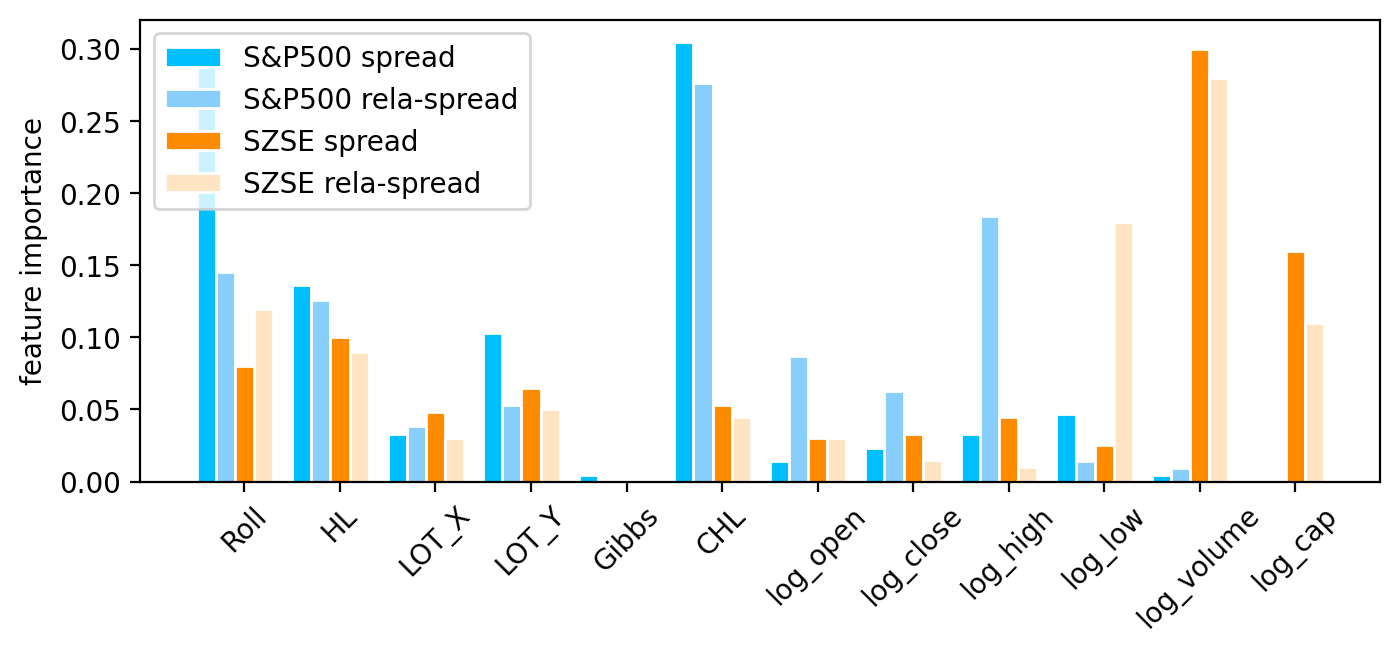

In [215]:
barWidth = 0.2
r1 = np.arange(len(fea_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize=(8,3), dpi=200)

ax1 = fig.add_subplot()
ax1.bar(r1, SP500_spread, color='deepskyblue',edgecolor='white',width=barWidth, label='S&P500 spread')
ax1.bar(r2, SP500_rela, color='lightskyblue',edgecolor='white',width=barWidth, label='S&P500 rela-spread')
ax1.bar(r3, SZSE_spread, color='darkorange',edgecolor='white',width=barWidth, label='SZSE spread')
ax1.bar(r4, SZSE_rela, color='bisque',edgecolor='white',width=barWidth, label='SZSE rela-spread')
plt.ylabel('feature importance')
# ax2.legend(loc=3)

plt.xticks([r + barWidth*2 for r in range(len(fea_names))], fea_names)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### GR-Net SHAP重要性

In [222]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\shap_gr_spread.pkl", 'rb') as f:
    SP500_spread = pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\shap_gr_rela.pkl", 'rb') as f:
    SP500_rela = pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\shap_gr_spread_SZSE.pkl", 'rb') as f:
    SZSE_spread = pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\shap_gr_rela_SZSE.pkl", 'rb') as f:
    SZSE_rela = pickle.load(f)

fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])

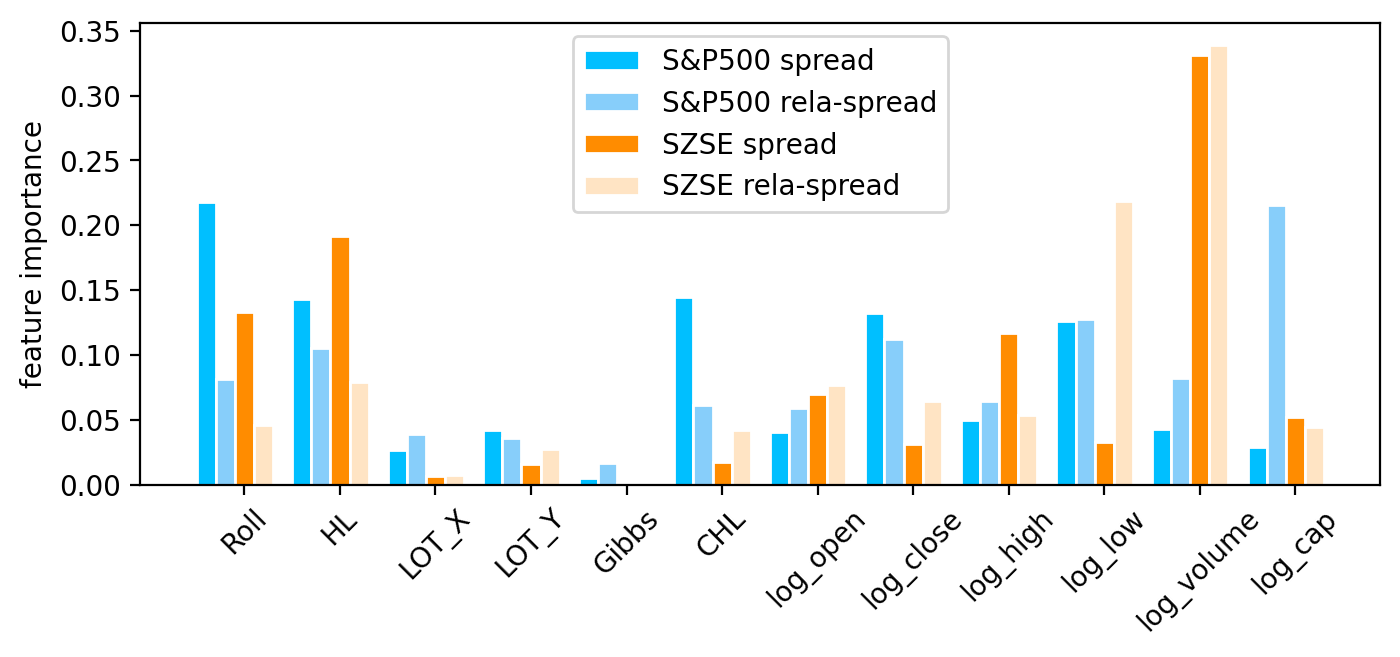

In [224]:
barWidth = 0.2
r1 = np.arange(len(fea_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize=(8,3), dpi=200)

ax1 = fig.add_subplot()
ax1.bar(r1, SP500_spread/np.sum(SP500_spread), color='deepskyblue',edgecolor='white',width=barWidth, label='S&P500 spread')
ax1.bar(r2, SP500_rela/np.sum(SP500_rela), color='lightskyblue',edgecolor='white',width=barWidth, label='S&P500 rela-spread')
ax1.bar(r3, SZSE_spread/np.sum(SZSE_spread), color='darkorange',edgecolor='white',width=barWidth, label='SZSE spread')
ax1.bar(r4, SZSE_rela/np.sum(SZSE_rela), color='bisque',edgecolor='white',width=barWidth, label='SZSE rela-spread')
plt.ylabel('feature importance')
# ax2.legend(loc=3)

plt.xticks([r + barWidth*2 for r in range(len(fea_names))], fea_names)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 绘制部份依赖图

In [31]:

with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_rela.pkl", 'rb') as f:
    x_m= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_rela.pkl", 'rb') as f:
    y_m = pickle.load(f)
    
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_rela_SZSE.pkl", 'rb') as f:
    x_m_s= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_rela_SZSE.pkl", 'rb') as f:
    y_m_s = pickle.load(f)

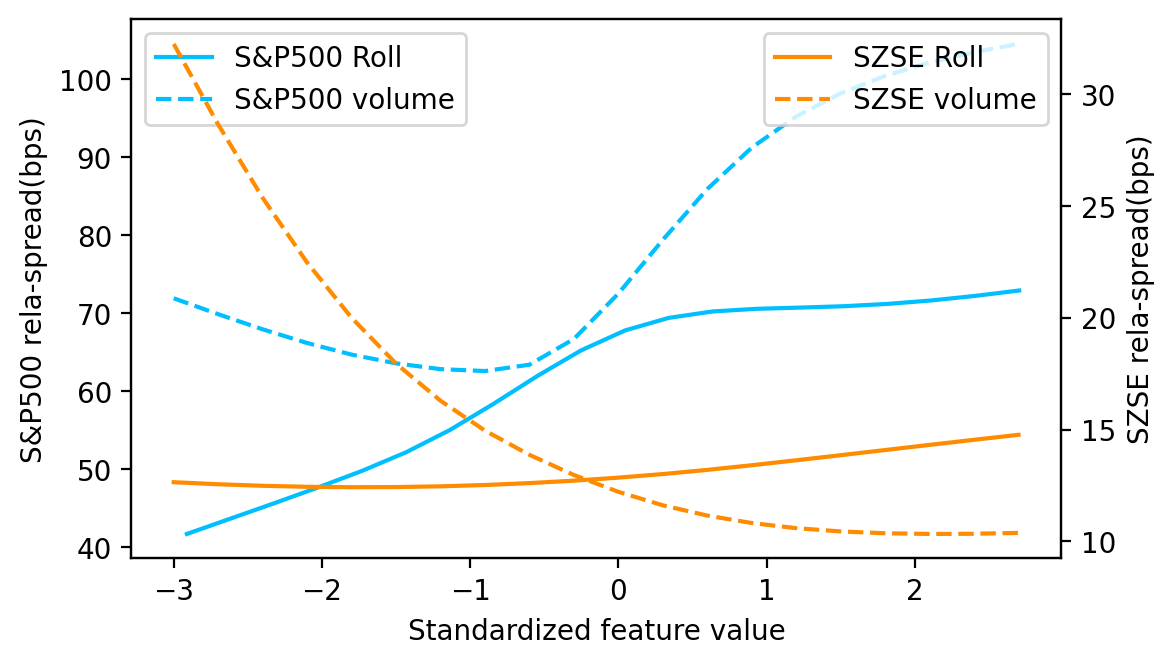

In [36]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])



fig = plt.figure(figsize=(6,3.5), dpi=200)
i = 5

ax1 = fig.add_subplot()
# ax1.set_ylim(-8,8)
ax1.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][0]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][0]]), 
         color='deepskyblue',label='S&P500 Roll')
# ax1.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]])/10, 
#          color='lightskyblue',label='S&P500 volume')
ax1.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]]), 
         color='deepskyblue',linestyle='--',label='S&P500 volume')
ax1.set_ylabel('S&P500 rela-spread(bps)')
plt.xlabel('Standardized feature value')
plt.legend()

ax2 = ax1.twinx()
# ax2.set_ylim(-2.5,2.5)
ax2.plot(x_m_s[0], np.array(y_m_s[0]), color='darkorange',label='SZSE Roll')
# ax2.plot(x_m_s[-2], np.array(y_m_s[-2])/10, color='bisque',label='SZSE volume')
ax2.plot(x_m_s[-2], np.array(y_m_s[-2]), color='darkorange', linestyle='--', label='SZSE volume')

ax2.set_ylabel('SZSE rela-spread(bps)')
# ax2.legend(loc=3)

# plt.xticks([r + barWidth*2 for r in range(len(fea_names))], fea_names)
plt.legend(loc=1)

plt.show()

In [9]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_spread.pkl", 'rb') as f:
    x_m= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_spread.pkl", 'rb') as f:
    y_m = pickle.load(f)
    
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_spread_SZSE.pkl", 'rb') as f:
    x_m_s= pickle.load(f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_spread_SZSE.pkl", 'rb') as f:
    y_m_s = pickle.load(f)

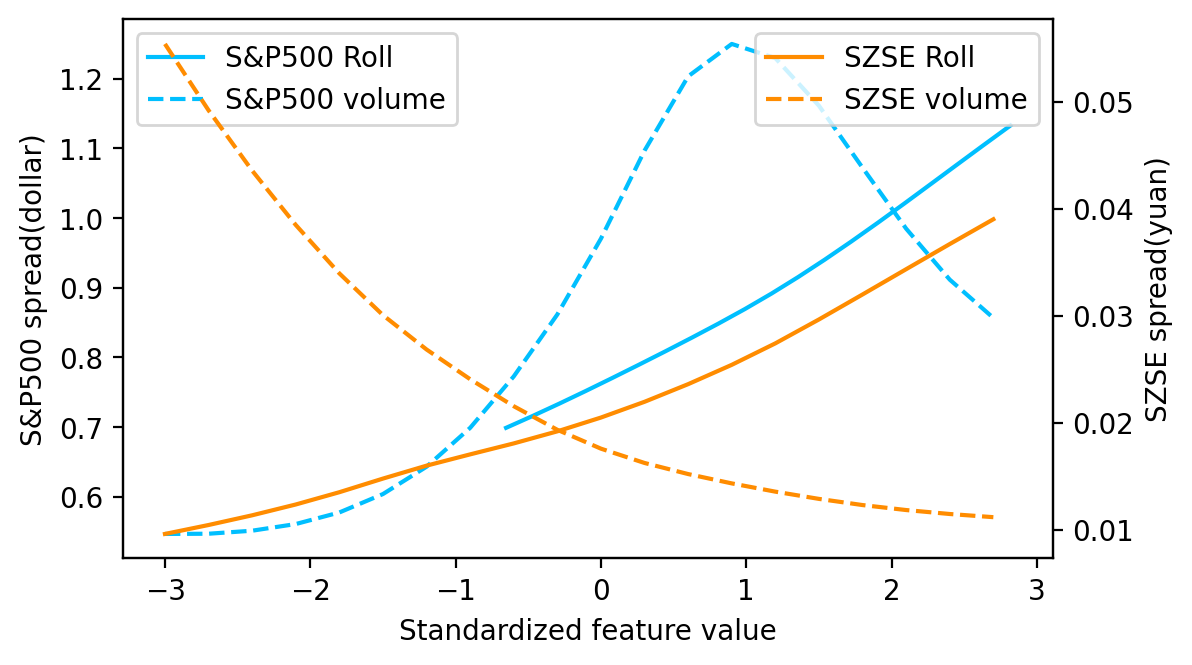

In [11]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])



fig = plt.figure(figsize=(6,3.5), dpi=200)
i = 5

ax1 = fig.add_subplot()
# ax1.set_ylim(-8,8)
ax1.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][0]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][0]]), 
         color='deepskyblue',label='S&P500 Roll')
# ax1.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]]), 
#          color='lightskyblue',label='S&P500 volume')
ax1.plot(x_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]], np.array(y_m[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11][-2]]), 
         color='deepskyblue', linestyle='--', label='S&P500 volume')
ax1.set_ylabel('S&P500 spread(dollar)')
plt.xlabel('Standardized feature value')
plt.legend()

ax2 = ax1.twinx()
# ax2.set_ylim(-2.5,2.5)
ax2.plot(x_m_s[0], np.array(y_m_s[0])/100, color='darkorange',label='SZSE Roll')
# ax2.plot(x_m_s[-2], np.array(y_m_s[-2])/100, color='bisque',label='SZSE volume')
ax2.plot(x_m_s[-2], np.array(y_m_s[-2])/100, color='darkorange', linestyle='--',label='SZSE volume')

ax2.set_ylabel('SZSE spread(yuan)')
plt.xlabel('Standardized feature value')
# ax2.legend(loc=3)

# plt.xticks([r + barWidth*2 for r in range(len(fea_names))], fea_names)
plt.legend(loc=1)
plt.show()

### 全样本PDP